In [1]:
import os
import pandas as pd
from konlpy.tag import Mecab
import re
from wordcloud import WordCloud

In [2]:
# CSV 파일 불러오기
train_data_path = "./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


## Step 1. 데이터 전처리 및 토크나이징

In [3]:
# PreprocessMecab 클래스 정의
class PreprocessMecab:
    def __init__(self):
        self.mecab = Mecab()
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 
            'JX', 'JC', 'SF', 'SP', 'SS', 'SE', 'SO', 'EP', 
            'EF', 'EC', 'ETN', 'ETM', 'XSN', 'XSV', 'XSA'
        ]
    
    def pos(self, sentence):
        return self.mecab.pos(sentence)
    
    def get_keywords(self, pos, without_tag=False):
        word_list = []
        for p in pos:
            if p[1] not in self.exclusion_tags:
                word_list.append(p if not without_tag else p[0])
        return word_list

# 전처리 함수 정의 (물음표 및 특수문자 제거)
def preprocess_conversation(conversation):
    if conversation is None or conversation.strip() == '':
        return ''
    
    # 모든 특수문자 제거 (물음표도 포함)
    conversation = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', conversation)
    
    pos_tags = preprocessor.pos(conversation)  # 형태소 분석
    keywords = preprocessor.get_keywords(pos_tags, without_tag=True)  # 키워드 추출
    return ' '.join(keywords)  # 키워드를 하나의 문자열로 반환

In [4]:
# 전처리 인스턴스 생성
preprocessor = PreprocessMecab()

# 전처리 적용
train_data['processed_conversation'] = train_data['conversation'].apply(preprocess_conversation)

# 결과 출력
train_data[['conversation', 'processed_conversation']].head()

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로 죽여 달 애원 것 인가 아닙니다 죄송 합니다 죽 거 면 혼자 죽 우...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 네 똑바로 들 한 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운 거 알 나 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 너 키...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어 이 거기 예 너 말 이 너 이리 오 무슨 일 너 옷 좋 보인다 얘 돈 좀 있 봐...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기 혹시 날 너무 뜨겁 잖아요 저희 회사 이 선크림 파 한 번 손등 발라 보 실래...


In [5]:
train_data[['conversation', 'processed_conversation']].head(15)

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로 죽여 달 애원 것 인가 아닙니다 죄송 합니다 죽 거 면 혼자 죽 우...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 네 똑바로 들 한 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운 거 알 나 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 너 키...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어 이 거기 예 너 말 이 너 이리 오 무슨 일 너 옷 좋 보인다 얘 돈 좀 있 봐...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기 혹시 날 너무 뜨겁 잖아요 저희 회사 이 선크림 파 한 번 손등 발라 보 실래...
5,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....,나 이틀 뒤 가 음식점 예약 좀 해 줘 저녁 7 시 가나다 음식점 이 응 남자 친구...
6,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...,35 번 손님 아이스커피 두 잔 나왔 아이스커피 네 맛있 드세요 저기요 아가씨 나 ...
7,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...,경비 아저씨 내차 경고장 붙였 내 여기 몇 년 사 아직 내차 인 줄 모르 이딴 식 ...
8,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...,이거 할인 된다면서요 확인 해 보 아까 저 시 람 할인 해 주 네 저 손 고객 이 ...
9,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...,자네 세금 계산서 보내 준 거 메일 수치 다르 그게 얼마나 해 먹 괜찮 다른 업체 ...


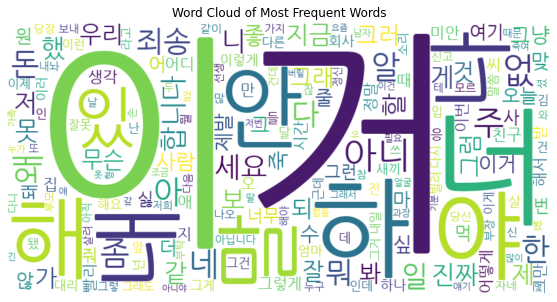

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 모든 전처리된 대화 데이터를 하나의 문자열로 결합
all_conversations = ' '.join(train_data['processed_conversation'])

# 단어를 분리하고 빈도 계산
words = all_conversations.split()
word_counts = Counter(words)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(word_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [8]:
# 불용어 리스트 로드
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()  # 줄 단위로 읽어 리스트로 저장
    return stopwords

# 불용어 파일 경로
stopwords = load_stopwords('./stopwords-ko.txt')

# DataFrame의 processed_conversation에서 불용어 제거
def remove_stopwords_from_conversations(conversation):
    # 키워드를 공백으로 분리
    words = conversation.split()
    # 불용어가 아닌 단어만 필터링
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)  # 필터링된 단어들을 공백으로 연결

# processed_conversation 열에서 불용어 제거 적용
train_data['processed_conversation'] = train_data['processed_conversation'].apply(remove_stopwords_from_conversations)

# 결과 확인
print(train_data[['processed_conversation']].head())


                              processed_conversation
0  지금 스스로 죽여 달 애원 인가 아닙니다 죄송 합니다 죽 거 면 죽 사건 휘말리 해...
1  길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 똑바로 한 번 더 ...
2  되게 귀여운 거 알 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 키 160 재...
3  거기 말 이리 옷 좋 보인다 얘 돈 있 돈 없 뒤져서 나오 넌 죽 오늘 피시방 콜 ...
4  날 너무 뜨겁 잖아요 회사 선크림 파 한 번 손등 발라 보 실래요 진짜 안 선크림 ...


In [9]:
train_data[['conversation', 'processed_conversation']].head(15)

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 스스로 죽여 달 애원 인가 아닙니다 죄송 합니다 죽 거 면 죽 사건 휘말리 해...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 똑바로 한 번 더 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,되게 귀여운 거 알 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 키 160 재...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,거기 말 이리 옷 좋 보인다 얘 돈 있 돈 없 뒤져서 나오 넌 죽 오늘 피시방 콜 ...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,날 너무 뜨겁 잖아요 회사 선크림 파 한 번 손등 발라 보 실래요 진짜 안 선크림 ...
5,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....,이틀 뒤 음식점 예약 해 줘 저녁 7 시 가나다 음식점 남자 친구 부모 인사 드리 ...
6,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...,35 번 손님 아이스커피 두 잔 나왔 아이스커피 맛있 드세요 저기요 아가씨 아스 시...
7,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...,경비 아저씨 내차 경고장 붙였 내 아직 내차 인 줄 모르 이딴 식 경고장 붙여 입주...
8,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...,이거 할인 된다면서요 확인 해 보 아까 시 람 할인 해 주 손 고객 십니다 고객 차...
9,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...,자네 세금 계산서 보내 준 거 메일 수치 다르 그게 해 먹 괜찮 업체 다 회사 비밀...


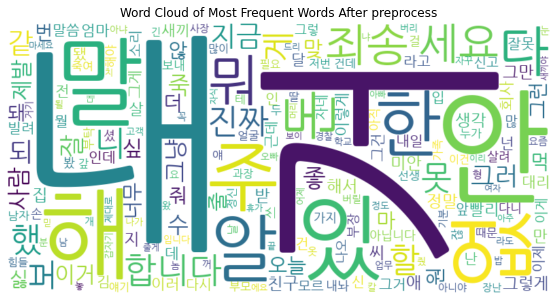

In [10]:
# 모든 전처리된 대화 데이터를 하나의 문자열로 결합
all_conversations = ' '.join(train_data['processed_conversation'])

# 단어를 분리하고 빈도 계산
words = all_conversations.split()
word_counts = Counter(words)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(word_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud of Most Frequent Words After preprocess')
plt.show()

Max word length: 220
Mean word length: 56.87
Min word length: 8


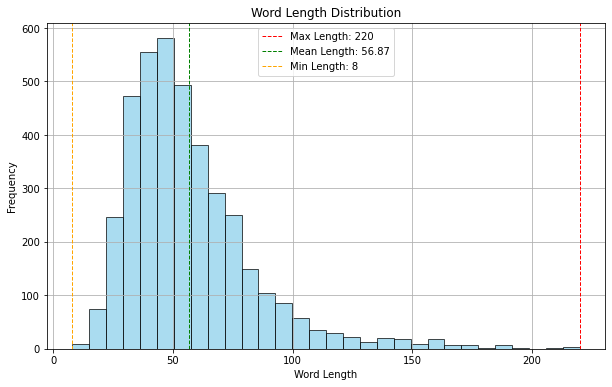

In [12]:
# Function to calculate word lengths
def calculate_word_lengths(conversations):
    lengths = [len(conversation.split()) for conversation in conversations]
    return lengths

# Calculate word lengths from the processed_conversation column
word_lengths = calculate_word_lengths(train_data['processed_conversation'])

# Calculate max, mean, and min word lengths
max_length = max(word_lengths)
mean_length = sum(word_lengths) / len(word_lengths)
min_length = min(word_lengths)

# Print results
print(f"Max word length: {max_length}")
print(f"Mean word length: {mean_length:.2f}")
print(f"Min word length: {min_length}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(max_length, color='red', linestyle='dashed', linewidth=1, label=f'Max Length: {max_length}')
plt.axvline(mean_length, color='green', linestyle='dashed', linewidth=1, label=f'Mean Length: {mean_length:.2f}')
plt.axvline(min_length, color='orange', linestyle='dashed', linewidth=1, label=f'Min Length: {min_length}')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


## 대략 Max_length를 135로 지정해도 괜찮을 듯?